In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
headers = ["incorrect", "correct", "sample_id", "aligner", "country"]
phdf = pd.read_csv("hxb2/plot_alns_Philippines.tsv", sep='\t', names=headers, header=None)
# brazildf = pd.read_csv("hxb2/plot_alns_Brazil.tsv", sep='\t', names=headers, header=None)
nagoyadf = pd.read_csv("hxb2/plot_alns_Japan.tsv", sep='\t', names=headers, header=None)
nicaraguadf = pd.read_csv("hxb2/plot_alns_Nicaragua.tsv", sep='\t', names=headers, header=None)

hxb2 = pd.concat([nagoyadf, nicaraguadf, phdf])
hxb2['reference'] = "hxb2"
hxb2.head()


,incorrect,correct,sample_id,aligner,country,reference
0,0.205246,0.794754,DRR030219,last,Japan,hxb2
1,0.104575,0.895425,DRR030219,last trained,Japan,hxb2
2,0.167103,0.832897,DRR030219,bowtie2,Japan,hxb2
3,0.206760,0.793240,DRR030221,last,Japan,hxb2
4,0.087745,0.912255,DRR030221,last trained,Japan,hxb2


In [52]:
phdf2 = pd.read_csv("new_ref/plot_alns_Philippines.tsv", sep='\t', names=headers, header=None)
# brazildf2 = pd.read_csv("new_ref/plot_alns_Brazil.tsv", sep='\t', names=headers, header=None)
nagoyadf2 = pd.read_csv("new_ref/plot_alns_Japan.tsv", sep='\t', names=headers, header=None)
nicaraguadf2 = pd.read_csv("new_ref/plot_alns_Nicaragua.tsv", sep='\t', names=headers, header=None)

new = pd.concat([nagoyadf2, nicaraguadf2, phdf2])
new['reference'] = "new"
new['sample_id'] = new['sample_id'].str.split('_').str[0]

new.head()

,incorrect,correct,sample_id,aligner,country,reference
0,0.247872,0.752128,DRR030219,last,Japan,new
1,0.119148,0.880852,DRR030219,last trained,Japan,new
2,0.191277,0.808723,DRR030219,bowtie2,Japan,new
3,0.245988,0.754012,DRR030221,last,Japan,new
4,0.094454,0.905546,DRR030221,last trained,Japan,new


In [59]:
merged = pd.concat([hxb2, new])
merged.head()

,incorrect,correct,sample_id,aligner,country,reference
0,0.205246,0.794754,DRR030219,last,Japan,hxb2
1,0.104575,0.895425,DRR030219,last trained,Japan,hxb2
2,0.167103,0.832897,DRR030219,bowtie2,Japan,hxb2
3,0.206760,0.793240,DRR030221,last,Japan,hxb2
4,0.087745,0.912255,DRR030221,last trained,Japan,hxb2


/Users/kimwilliamelee/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kimwilliamelee/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


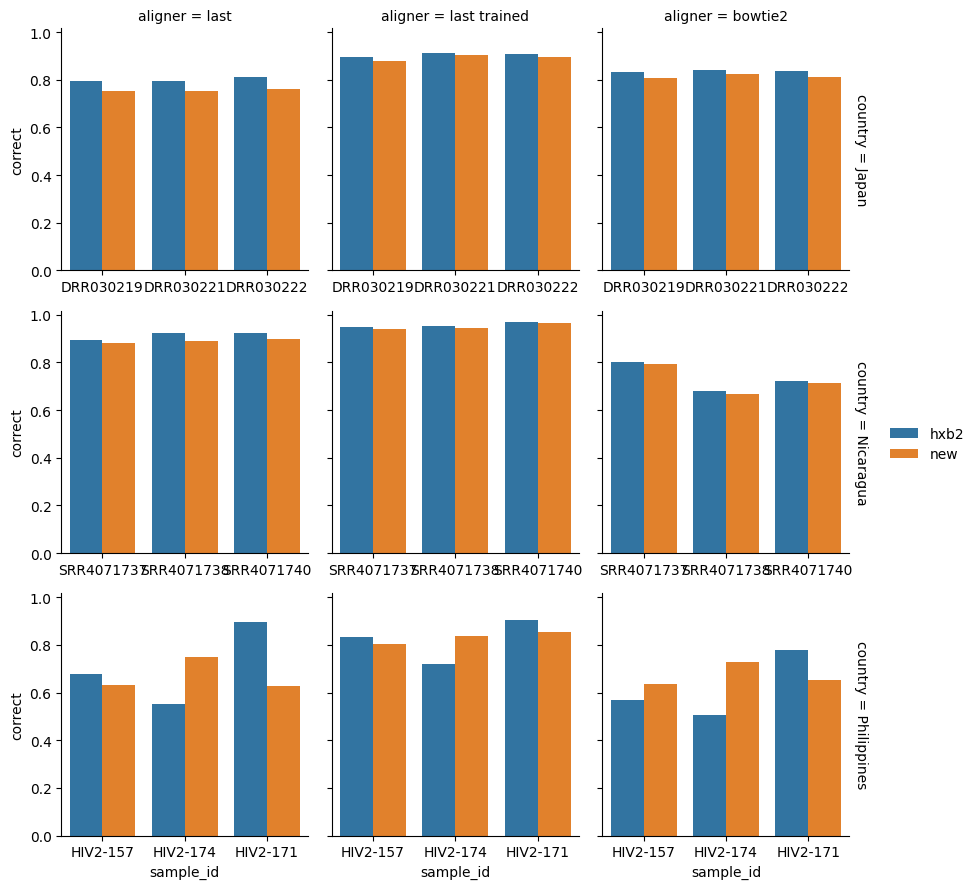

In [60]:
g = sns.FacetGrid(merged, row="country", col="aligner", margin_titles=True, sharex=False)
g.map(sns.barplot, "sample_id", "correct", "reference", palette=sns.color_palette("tab10"))
g.add_legend()

/Users/kimwilliamelee/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kimwilliamelee/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


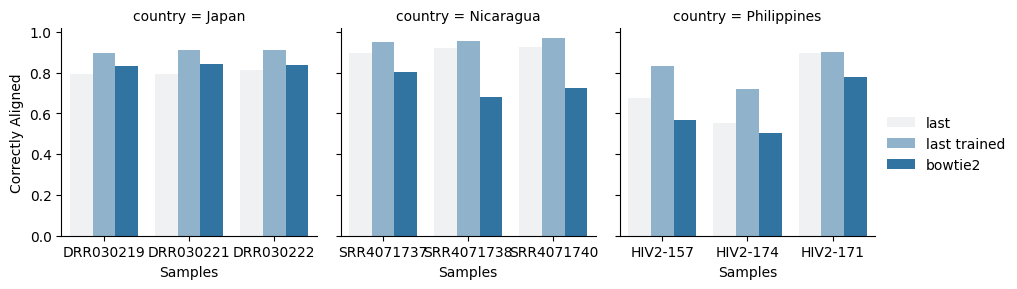

In [63]:
# a scatter/dot- plot: fraction of reads aligned on x-axis, and fraction of correct alignments on y-axis. 
# colored by country.



g = sns.FacetGrid(hxb2, col='country', sharex=False)

g.map(sns.barplot, 'sample_id', 'correct', 'aligner')
g.set_axis_labels('Samples', 'Correctly Aligned')
g.add_legend()

plt.show()

/Users/kimwilliamelee/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kimwilliamelee/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


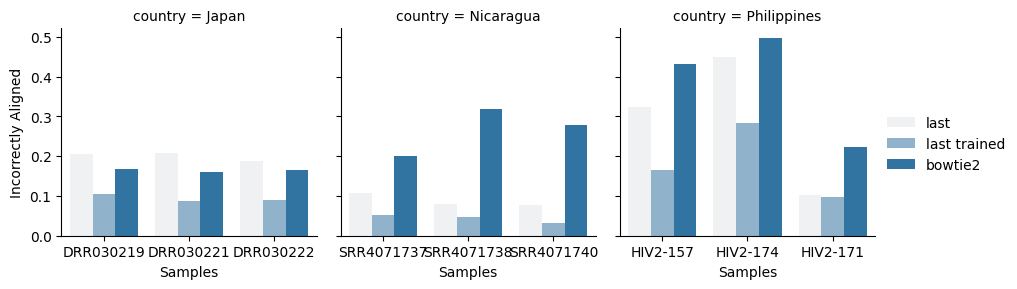

In [64]:
g = sns.FacetGrid(hxb2, col='country', sharex=False)

g.map(sns.barplot, 'sample_id', 'incorrect', 'aligner')
g.set_axis_labels('Samples', 'Incorrectly Aligned')
g.add_legend()

plt.show()